# 4.10 Instacart Project Part 1

## Contents

    1. Importing libraries and importing df from 4.9
    
    2. Addressing PII data
    
    3. Creating regional segmentation column
     3A. Divide country into 4 regions
     3B. Comparison of spending habits between regions
     
    4. Creating exlusion flag for low activity customers
    
    5. Creating relevant customer profiles
     5A. Age range profile column
     5B. Income range profile column
     5C. Merge department df and create special goods customer profile columns
    
    Export df and continue in new notbook

### 1. Import libraries and df

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create path

path = r'/Users/jonathanfava/07-2022 Instacart Basket Analysis'

In [3]:
# import df

df_opc = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [4]:
# check df

df_opc.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,#_dependants,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [5]:
# check df

df_opc.shape

(32404859, 35)

### 2. Addressing any PII data
- Removed the first_name and last_name columns to protect customers

In [6]:
# removing customer first & last name columns 

df_opc_2 = df_opc.drop(columns = ['first_name', 'last_name'])

In [7]:
# check output

df_opc_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,...,spending_flag,med_ord_freq,frequency_flag,gender,state,age,date_joined,#_dependants,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620


### 3. Creating a regional segmentation column

#### 3A. Region column contains 4 regional categories(northeast, midwest, south & west)

In [8]:
# create series with regions and their respective states

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 
             'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 
           'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
         'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 
         'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 
        'Oregon', 'California', 'Hawaii']

In [9]:
# create region column

df_opc_2.loc[df_opc_2['state'].isin(Northeast), 'region'] = 'Northeast'
df_opc_2.loc[df_opc_2['state'].isin(Midwest), 'region'] = 'Midwest'
df_opc_2.loc[df_opc_2['state'].isin(South), 'region'] = 'South'
df_opc_2.loc[df_opc_2['state'].isin(West), 'region'] = 'West'

In [10]:
# check outputs

df_opc_2['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5055654
Name: region, dtype: int64

In [11]:
# check output 

df_opc_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,...,med_ord_freq,frequency_flag,gender,state,age,date_joined,#_dependants,marital_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest


In [12]:
# check output

df_opc_2['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5055654
Name: region, dtype: int64

#### 3B. Creating a crosstab to compare spending habits across regions

In [13]:
# create cross table comparing region and spending flag

region_spend = pd.crosstab(index=df_opc_2['region'], columns=df_opc_2['spending_flag'])

In [14]:
# check and display output

region_spend

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,97759,4957895
South,209691,10582194
West,160354,8132559


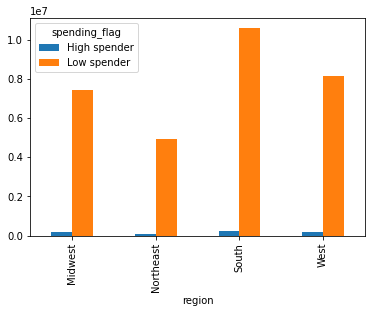

In [15]:
# create bar plot with crosstab 

region_spend_plot = region_spend.plot.bar()

## 4. Creating exclusion flag for low activity customers

In [16]:
# use forloop to create exclusion flag for low activity customer

result = []

for value in df_opc_2['max_order']:
    if value < 5 :
        result.append('Low activity')
    else:
        result.append('High activity')

In [17]:
# check result

result

['High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High activity',
 'High act

In [18]:
# create new column and apply result

df_opc_2['activity_flag'] = result

In [19]:
# check output

df_opc_2['activity_flag'].value_counts()

High activity    30964564
Low activity      1440295
Name: activity_flag, dtype: int64

## 5. Creating relevant customer profiles

#### 5A. Age range profile column - Age groups: <30 = young adult, >=30 and <40 = adult, >=40 and <60 = middle age, >=60 = senior 

In [20]:
# creating column and age grouping

df_opc_2.loc[df_opc_2['age'] < 30, 'age_profile'] = 'Young adult'

In [21]:
df_opc_2.loc[(df_opc_2['age'] >= 30) & (df_opc_2['age'] < 40), 'age_profile'] = 'Adult'

In [22]:
df_opc_2.loc[(df_opc_2['age'] >= 40) & (df_opc_2['age'] < 60), 'age_profile'] = 'Middle Aged'

In [23]:
df_opc_2.loc[df_opc_2['age'] >= 60, 'age_profile'] = 'Senior'

In [24]:
# check output

df_opc_2['age_profile'].value_counts()

Senior         11067255
Middle Aged    10173412
Young adult     6090441
Adult           5073751
Name: age_profile, dtype: int64

Text(0.5, 1.0, 'Amount of orders by age profile')

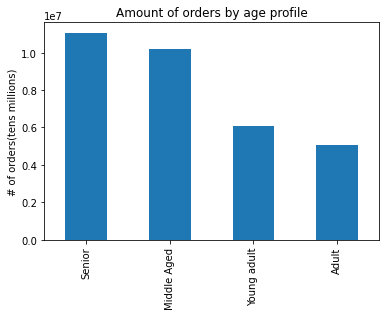

In [25]:
# create bar chart to show distribution of age profile

age_bar = df_opc_2['age_profile'].value_counts().plot.bar()
plt.ylabel('# of orders(tens millions)')
plt.title('Amount of orders by age profile')

In [26]:
# statistics for usage frequency of age profiles

df_opc_2.groupby(['age_profile']).agg({'max_order': ['min', 'max', 'mean']})

max_order               
                  min max       mean
age_profile                         
Adult               3  99  33.265472
Middle Aged         3  99  33.054079
Senior              1  99  32.983166
Young adult         3  99  32.996662

In [27]:
# statistics for avg expenditure for age profiles

df_opc_2.groupby(['age_profile']).agg({'avg_spent': ['min', 'max', 'mean']})

avg_spent                         
                  min           max       mean
age_profile                                   
Adult             1.0  12506.925000  11.933288
Middle Aged       1.0  25005.425000  12.124786
Senior            1.0  14042.512281  11.763336
Young adult       1.0  10209.987755  12.171977

#### 5B. Income range profile column - Income groups: <=50k = low,  >50k and <=100k = middle,  >100k and <=250k = upper, >250k = high 

In [28]:
# creating column and income range grouping

df_opc_2.loc[df_opc_2['income'] <=50000, 'income_profile'] = 'low'

In [29]:
df_opc_2.loc[(df_opc_2['income'] > 50000) & (df_opc_2['age'] <= 100000), 'income_profile'] = 'middle'

In [30]:
df_opc_2.loc[(df_opc_2['income'] > 100000) & (df_opc_2['age'] <= 250000), 'income_profile'] = 'upper'

In [31]:
df_opc_2.loc[df_opc_2['income'] >250000, 'income_profile'] = 'high'

In [32]:
# check output

df_opc_2['income_profile'].value_counts()

upper     14631622
middle    13996574
low        3594083
high        182580
Name: income_profile, dtype: int64

Text(0.5, 1.0, 'Amount of orders by Income Profile')

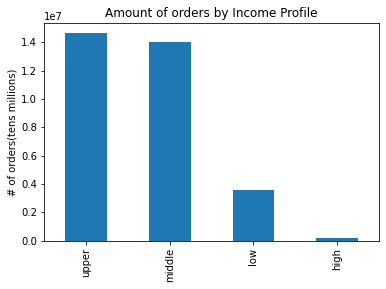

In [33]:
# create bar chart to show distribution of income profile

income_bar = df_opc_2['income_profile'].value_counts().plot.bar()
plt.ylabel('# of orders(tens millions)')
plt.title('Amount of orders by Income Profile')

In [34]:
# statistics for usage frequency of income profiles

df_opc_2.groupby(['income_profile']).agg({'max_order': ['min', 'max', 'mean']})

max_order               
                     min max       mean
income_profile                         
high                   3  99  38.513441
low                    2  99  30.521551
middle                 3  99  33.431833
upper                  1  99  33.242447

In [35]:
# statistics for avg expenditure for income profiles

df_opc_2.groupby(['income_profile']).agg({'avg_spent': ['min', 'max', 'mean']})

avg_spent                          
                     min           max        mean
income_profile                                    
high             24.1033  11772.100000  259.022644
low               1.0000     13.878571    6.696985
middle            1.1000   7700.025641    8.468592
upper             7.0000  25005.425000   13.554504

#### 5C. Merge department df with main df and create special goods profile columns for "pets", "baby" & "alcohol"

In [36]:
# import department df

df_dep1 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'department_wrangled.csv')).shift()[1:]

In [37]:
# check import

df_dep1.head(25)

,Unnamed: 0,department
1,1.0,frozen
2,2.0,other
3,3.0,bakery
4,4.0,produce
5,5.0,alcohol
6,6.0,international
7,7.0,beverages
8,8.0,pets
9,9.0,dry goods pasta
10,10.0,bulk


In [38]:
# drop unnamed column from dep1 df

df_dep1.drop(columns=['Unnamed: 0'])

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [39]:
# merged departments df with main df

df_merge = df_opc_2.merge(df_dep1, how='inner', left_on='department_id', right_index=True)

In [40]:
# check ouput 

df_merge[['department', 'department_id']].head()

,department,department_id
0,snacks,19
1,snacks,19
6,snacks,19
30,snacks,19
41,snacks,19


In [41]:
# create flag column for customers with babies

result2 = []

for value in df_merge['department']:
    if value == 'babies':
        result2.append('yes')
    else:
        result2.append('no')

In [42]:
# create baby column and apply result

df_merge['has_baby'] = result2

In [43]:
# create flag column for customers with pets

result3 = []

for value in df_merge['department']:
    if value == 'pets':
        result3.append('yes')
    else:
        result3.append('no')

In [44]:
# create pets column and apply result

df_merge['has_pets'] = result3

In [45]:
# create flag column for customers with buy alcohol

result4 = []

for value in df_merge['department']:
    if value == 'alcohol':
        result4.append('yes')
    else:
        result4.append('no')

In [46]:
# create alcohol consumer column and apply result

df_merge['alcohol_consumer'] = result4

In [47]:
# check outputs

df_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,...,income,region,activity_flag,age_profile,income_profile,Unnamed: 0,department,has_baby,has_pets,alcohol_consumer
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,49620,Midwest,High activity,Senior,low,19.0,snacks,no,no,no
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,49620,Midwest,High activity,Senior,low,19.0,snacks,no,no,no
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,49620,Midwest,High activity,Senior,low,19.0,snacks,no,no,no
30,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,7,0,12,...,49620,Midwest,High activity,Senior,low,19.0,snacks,no,no,no
41,13424,Almonds,45,19,4.2,3139998,138,28,6,11,...,49620,Midwest,High activity,Senior,low,19.0,snacks,no,no,no


Text(0.5, 1.0, 'Amount of orders by baby orders')

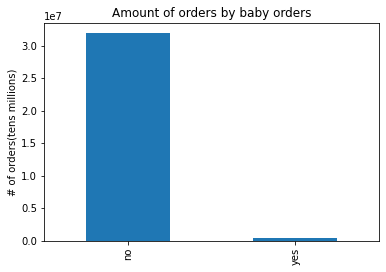

In [48]:
# create bar chart to show distribution of baby orders

bby_bar = df_merge['has_baby'].value_counts().plot.bar()
plt.ylabel('# of orders(tens millions)')
plt.title('Amount of orders by baby orders')

Text(0.5, 1.0, 'Amount of orders by Pet Orders')

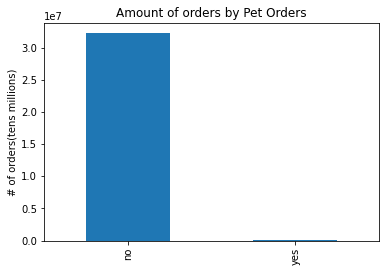

In [49]:
# create bar chart to show distribution of pets orders

pet_bar = df_merge['has_pets'].value_counts().plot.bar()
plt.ylabel('# of orders(tens millions)')
plt.title('Amount of orders by Pet Orders')

Text(0.5, 1.0, 'Amount of orders by Alcohol')

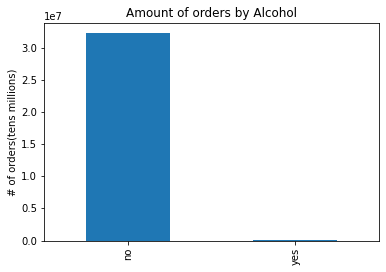

In [50]:
# create bar chart to show distribution of alcohol orders

alc_bar = df_merge['alcohol_consumer'].value_counts().plot.bar()
plt.ylabel('# of orders(tens millions)')
plt.title('Amount of orders by Alcohol')

In [51]:
# drop unnecessary column(unnamed:0)

df_merge.drop(columns = ['Unnamed: 0'])

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,...,marital_status,income,region,activity_flag,age_profile,income_profile,department,has_baby,has_pets,alcohol_consumer
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,married,49620,Midwest,High activity,Senior,low,snacks,no,no,no
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,married,49620,Midwest,High activity,Senior,low,snacks,no,no,no
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,married,49620,Midwest,High activity,Senior,low,snacks,no,no,no
30,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,7,0,12,...,married,49620,Midwest,High activity,Senior,low,snacks,no,no,no
41,13424,Almonds,45,19,4.2,3139998,138,28,6,11,...,married,49620,Midwest,High activity,Senior,low,snacks,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32400733,25524,Infant Formula With Iron,92,18,4.4,1137249,154028,1,1,16,...,divorced/widowed,49144,South,Low activity,Senior,low,babies,yes,no,no
32401484,49215,Kids Sensible Foods Broccoli Littles,92,18,2.0,757647,6228,1,6,15,...,married,46523,West,Low activity,Middle Aged,low,babies,yes,no,no
32402049,28337,Swaddlers Diapers Giant Pack - Size 3,56,18,11.8,3219892,126356,1,3,19,...,single,68385,Midwest,Low activity,Young adult,middle,babies,yes,no,no
32402050,37289,Morning Mish Mash Blueberry Oats & Quinoa Snack,92,18,11.2,361832,126356,2,0,18,...,single,68385,Midwest,Low activity,Young adult,middle,babies,yes,no,no


#### D. Family size profile column - Family sizing(# of dependants): <1 = single,  >=1 and <=2 = small,  >=3 and <=4 = med, >4 = large 

In [52]:
# creating column and family size grouping

df_merge.loc[df_merge['#_dependants'] <1, 'family_size'] = 'single'

In [53]:
df_merge.loc[(df_merge['#_dependants'] >=1) & (df_merge['#_dependants'] <=2), 'family_size'] = 'small'

In [54]:
df_merge.loc[(df_merge['#_dependants'] >=3) & (df_merge['#_dependants'] <=4), 'family_size'] = 'medium'

In [55]:
df_merge.loc[df_merge['#_dependants'] >4, 'family_size'] = 'large'

In [56]:
df_merge['family_size'].value_counts()

small     16137640
medium     8117659
single     8080415
Name: family_size, dtype: int64

In [57]:
df_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,...,region,activity_flag,age_profile,income_profile,Unnamed: 0,department,has_baby,has_pets,alcohol_consumer,family_size
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Midwest,High activity,Senior,low,19.0,snacks,no,no,no,small
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Midwest,High activity,Senior,low,19.0,snacks,no,no,no,small
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,Midwest,High activity,Senior,low,19.0,snacks,no,no,no,small
30,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,7,0,12,...,Midwest,High activity,Senior,low,19.0,snacks,no,no,no,small
41,13424,Almonds,45,19,4.2,3139998,138,28,6,11,...,Midwest,High activity,Senior,low,19.0,snacks,no,no,no,small


Text(0.5, 1.0, 'Amount of orders by Family Profiles')

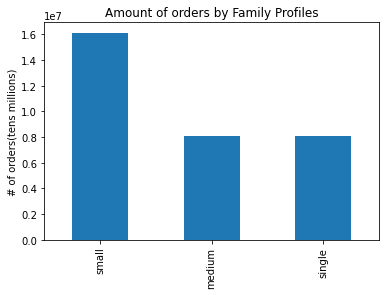

In [58]:
# create bar chart to show distribution of family size profile

fam_bar = df_merge['family_size'].value_counts().plot.bar()
plt.ylabel('# of orders(tens millions)')
plt.title('Amount of orders by Family Profiles')

In [59]:
# statistics for usage frequency of family size profiles

df_merge.groupby(['family_size']).agg({'max_order': ['min', 'max', 'mean']})

max_order               
                  min max       mean
family_size                         
medium              1  99  33.043347
single              2  99  33.308042
small               2  99  32.944057

In [60]:
# statistics for avg expenditure for family size profiles

df_merge.groupby(['family_size']).agg({'avg_spent': ['min', 'max', 'mean']})

avg_spent                         
                  min           max       mean
family_size                                   
medium            1.0  10209.987755  11.790657
single            1.0  25005.425000  12.128316
small             1.0  12506.925000  12.002989

## Export df and continue in new notebook

In [51]:
# export df as pickle

df_merge.to_pickle(os.path.join(path, '02 Data', 'prepared data', 'df_410_p1.pkl'))